In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
df['new_cases'] = df.cases - df.cases.shift().fillna(0)
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)
df.tail()

,cases,deaths,new_cases,weekly_avg
date,,,,
2021-02-13,27619266,484074,84727.0,94484.285714
2021-02-14,27683116,485154,63850.0,91130.142857
2021-02-15,27738488,486148,55372.0,85786.142857
2021-02-16,27802864,487855,64376.0,81199.857143
2021-02-17,27873040,490326,70176.0,77665.428571


In [41]:
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
ts['cap'] = 30000
ts['floor'] = 0
ts.head()

,ds,y,cap,floor
date,,,,
2020-01-21,2020-01-21,1.0,30000,0
2020-01-22,2020-01-22,0.0,30000,0
2020-01-23,2020-01-23,0.0,30000,0
2020-01-24,2020-01-24,1.0,30000,0
2020-01-25,2020-01-25,1.0,30000,0


In [52]:
m = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=1)
m.fit(ts)

future = m.make_future_dataframe(periods=25)
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-88.224560,-20999.986772,20619.862026
1,2020-01-22,-98.896291,-19590.081816,20850.639731
2,2020-01-23,-109.568022,-19372.048684,19605.512348
3,2020-01-24,-120.239753,-20883.650541,17897.665509
4,2020-01-25,-130.911484,-21512.754496,19480.014098
...,...,...,...,...
414,2021-03-10,-42322.226615,-67283.197506,-16608.619559
415,2021-03-11,-47106.995305,-73270.275250,-21120.494003
416,2021-03-12,-51891.763995,-78123.597732,-25940.425878
417,2021-03-13,-56676.532685,-83983.985488,-28999.451952


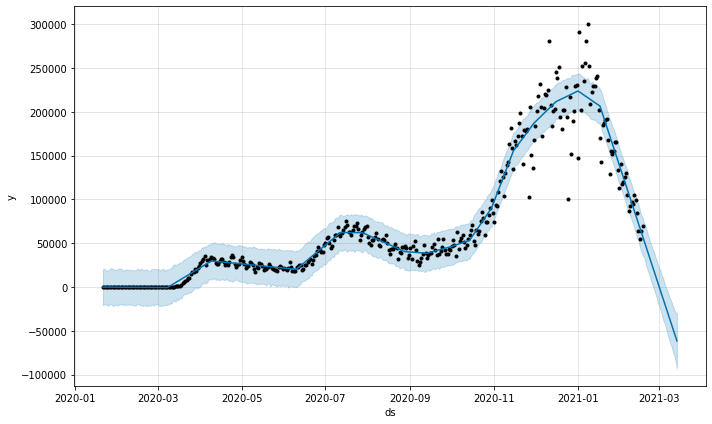

In [53]:
fig = m.plot(forcast)

In [54]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),m,forcast)

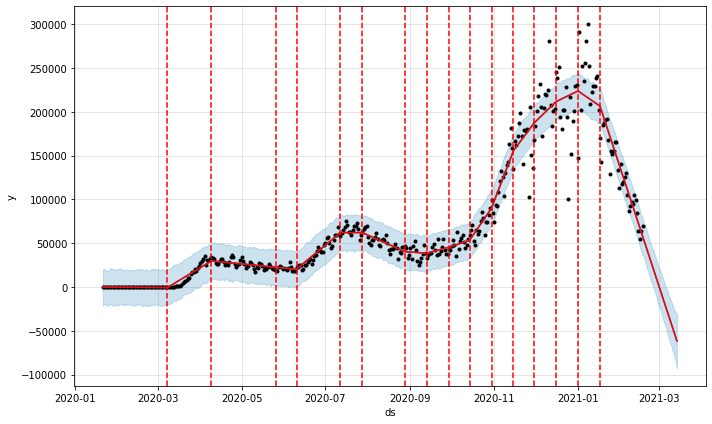

In [55]:
fig

In [56]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forcast)